# Imports

In [1]:
from pynq import Overlay, DefaultIP
from IPython.display import Image
import time
import numpy as np
import cv2

# .bit & .hwh files

In [2]:
overlay = Overlay("./sum.bit")

In [3]:
overlay.ip_dict.keys()

dict_keys(['sum_0', 'processing_system7_0'])

In [4]:
sum_0 = overlay.sum_0

In [5]:
sum_0.register_map.Memory_mat

Register(value=0)

In [6]:
def get_register_offset(overlay, ip, parameter):
    return overlay.ip_dict[ip]['registers'][parameter]['address_offset']

In [7]:
overlay.ip_dict["sum_0"]['registers']["res"]

{'address_offset': 16,
 'size': 32,
 'access': 'read-only',
 'description': 'Data signal of res',
 'fields': {'res': {'bit_offset': 0,
   'bit_width': 32,
   'access': 'read-only',
   'description': 'Bit 31 to 0 of res'}}}

In [8]:
overlay.ip_dict["sum_0"]['registers']["Memory_mat"]

{'address_offset': 64,
 'size': 64,
 'access': 'read-write',
 'description': 'Memory mat',
 'fields': {}}

In [9]:
values = [i for i in range(9)]

In [10]:
for i in range(9):
    sum_0.write(0x40 + i*4, values[i])

In [11]:
sum_0.write(0x00, 0x01)

In [12]:
sum_0.read(0x10)

36

In [13]:
sum(values)

36

# Image manipulation

In [14]:
def image_read(fname):
    fp = open(fname,'r') 
    tmp = int(fp.readline())
    width = tmp
    tmp = int(fp.readline()) 
    height = tmp;
    in_width  = width
    in_height = height 
    in_ch1 = [[0 for y in range(height)] for x in range(width)]
    in_ch2 = [[0 for y in range(height)] for x in range(width)]
    in_ch3 = [[0 for y in range(height)] for x in range(width)]
    for x in range(width): 
        for y in range(height):
            tmp = int(fp.readline())
            in_ch1[x][y] = int(tmp)
            tmp = int(fp.readline())
            in_ch2[x][y] = tmp 
            tmp = int(fp.readline())
            in_ch3[x][y] =  tmp
    fp.close() 
    return in_width, in_height, in_ch1, in_ch2, in_ch3

In [15]:
def image_write(out_width, out_height, out_ch1, out_ch2, out_ch3, fname):
    fp = open(fname,'w')
    width = out_width   
    fp.write('{}\n'.format(width)); 
    height = out_height  
    fp.write('{}\n'.format(height));
    for x in range(width):   
        for y in range(height):  
            tmp = out_ch1[x][y] 
            fp.write('{}\n'.format(tmp))
            tmp = out_ch2[x][y]  
            fp.write('{}\n'.format(tmp)) 
            tmp = out_ch3[x][y] 
            fp.write('{}\n'.format(tmp))
    fp.close()   # fclose(fp);

In [22]:
def display(file_jpg):
    return Image(filename=file_jpg) 

In [17]:
def raw_rgb_image(in_width, in_height, in_ch1, in_ch2, in_ch3):
    
    rgb = np.ndarray((in_width,in_height,3), np.int16)  
    rgb[:,:,0] = in_ch1
    rgb[:,:,1] = in_ch2
    rgb[:,:,2] = in_ch3
    
    return rgb

In [18]:
#Convert .data to .jpg
def dat2jpg(file_data, file_jpg):
    tmp_width, tmp_height, tmp_ch1, tmp_ch2, tmp_ch3 = image_read(file_data)
    new_rgb = raw_rgb_image(tmp_width, tmp_height, tmp_ch1, tmp_ch2, tmp_ch3)
    cv2.imwrite(file_jpg, new_rgb) 

In [19]:
def get_duration(start, end):
    delta_t = round((end - start) * 1000, 1)
    print('Duration : {0} ms'.format(delta_t))
    return delta_t

In [20]:
#openimg("./input.dat");

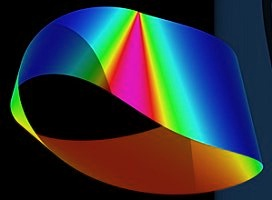

In [23]:
dat2jpg("./input.dat", "./input.jpg")
display("./input.jpg")